# CALIBRATION

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models

## Opening files

In [13]:


# Importing Data
x = []
y = []

# Open file in read mode
with open("../251119 Natrium 22 calibratie.csv", "r", newline="") as file:
    # Skip header
    next(file)

    for line in file:
        # split column
        line_splitted = line.split(",")
        x.append(float(line_splitted[0]))
        y.append(float(line_splitted[1]))

# Convert lists to numpy arrays
x_array = np.array(x)
y_array = np.array(y)



## Define ranges of masked / unmasked ranges

In [14]:


# Define the two unmasked x-ranges
x_min1, x_max1 = 197, 210
x_min2, x_max2 = 500, 512

# Create boolean masks for each unmasked range
mask_range1 = (x_array >= x_min1) & (x_array <= x_max1)
mask_range2 = (x_array >= x_min2) & (x_array <= x_max2)

# Combine both unmasked ranges
unmasked_mask = mask_range1 | mask_range2

# Masked = everything outside both ranges
masked_mask = ~unmasked_mask

# Separate data for plotting/fitting
x_selection_1 = x_array[mask_range1]
y_selection_1 = y_array[mask_range1]

x_selection_2 = x_array[mask_range2]
y_selection_2 = y_array[mask_range2]

x_masked = x_array[masked_mask]
y_masked = y_array[masked_mask]



## Fit to Gaussian funtion

In [15]:


# --- Fit Gaussian to first range ---
gauss1 = models.GaussianModel(prefix='g1_')
pars1 = gauss1.guess(y_selection_1, x=x_selection_1)
result1 = gauss1.fit(y_selection_1, pars1, x=x_selection_1)

print(x_selection_1)
print(y_selection_1)
print(max(y_selection_1))

# Fit Gaussian to second range
gauss2 = models.GaussianModel(prefix="g2_")
pars2 = gauss2.guess(y_selection_2, x=x_selection_2)
result2 = gauss2.fit(y_selection_2, pars2, x=x_selection_2)


[198.03921569 201.96078431 205.88235294 209.80392157]
[ 35. 312. 342.  26.]
342.0


## Creating Plot with Gaussian fits

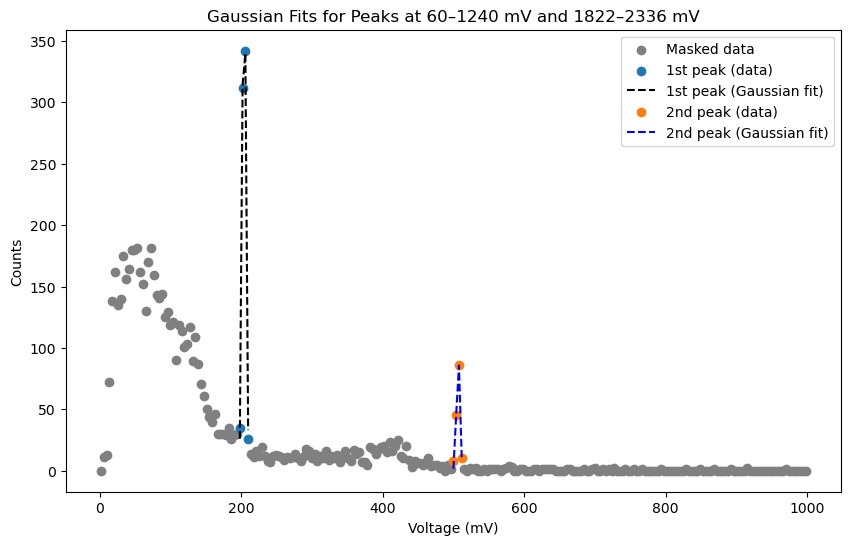

In [16]:
plt.figure(figsize=(10, 6))

# Masked data (outside both peaks)
plt.scatter(x_masked, y_masked, color="grey", label="Masked data")

# Unmasked and fitted data for each peak
plt.scatter(x_selection_1, y_selection_1, label="1st peak (data)")
plt.plot(x_selection_1, result1.best_fit, "k--", label="1st peak (Gaussian fit)")

plt.scatter(x_selection_2, y_selection_2, label="2nd peak (data)")
plt.plot(x_selection_2, result2.best_fit, "b--", label="2nd peak (Gaussian fit)")

plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Gaussian Fits for Peaks at 60–1240 mV and 1822–2336 mV")
plt.legend()
plt.show()



## Fit result

In [17]:

print("\n=== Gaussian Fit 1 (60–1240 mV) ===")
print(result1.fit_report())

print("\n=== Gaussian Fit 2 (1822–2336 mV) ===")
print(result2.fit_report())



=== Gaussian Fit 1 (60–1240 mV) ===
[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 4
    # variables        = 3
    chi-square         = 138.056715
    reduced chi-square = 138.056715
    Akaike info crit   = 20.1654809
    Bayesian info crit = 18.3243640
    R-squared          = 0.99843832
[[Variables]]
    g1_amplitude:  2800.64684 +/- 92.0852462 (3.29%) (init = 1858.824)
    g1_center:     204.049640 +/- 0.08065473 (0.04%) (init = 205.8824)
    g1_sigma:      2.52617254 +/- 0.14710752 (5.82%) (init = 1.960784)
    g1_fwhm:       5.94868162 +/- 0.34641174 (5.82%) == '2.3548200*g1_sigma'
    g1_height:     442.288273 +/- 19.8969347 (4.50%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(g1_amplitude, g1_sigma) = +0.6394
    C(g1_center, g1_sigma)    = +0.1310

=== Gaussian Fit 2 (1822–2336 mV) ===
[[Model]]
    Model(gauss

Lineaire fit

## Cesium fit and fit results

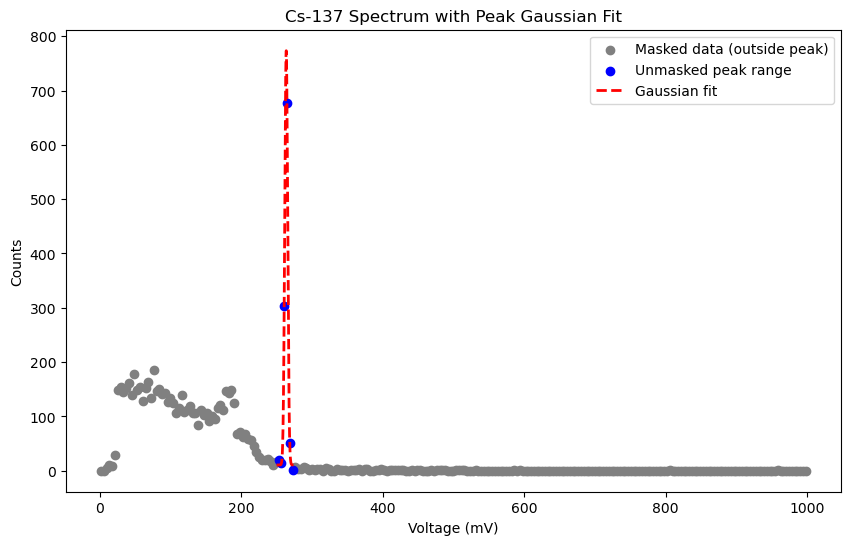

[[Model]]
    (Model(gaussian, prefix='cs_') + Model(constant, prefix='bkg_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 6
    # variables        = 4
    chi-square         = 145.605815
    reduced chi-square = 72.8029076
    Akaike info crit   = 27.1348616
    Bayesian info crit = 26.3018995
    R-squared          = 0.99959988
[[Variables]]
    cs_amplitude:  3937.81834 +/- 85.1730956 (2.16%) (init = 677)
    cs_center:     263.635939 +/- 0.06206928 (0.02%) (init = 264.7059)
    cs_sigma:      2.05953907 +/- 0.07241945 (3.52%) (init = 4)
    bkg_c:         10.5161644 +/- 5.11272170 (48.62%) (init = 2)
    cs_fwhm:       4.84984380 +/- 0.17053476 (3.52%) == '2.3548200*cs_sigma'
    cs_height:     762.773733 +/- 18.8652705 (2.47%) == '0.3989423*cs_amplitude/max(1e-15, cs_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(cs_center, cs_sigma)     = +0.8310
    C(cs_amplitude, bkg_c)     = -0.7312
    C(cs_am

In [18]:
# --- Opening File for Cs-137 ---
cs_voltage = []
cs_counts = []

with open("../251119 Cesium 137 calibratie.csv", "r", newline="") as file:
    next(file)
    for line in file:
        parts = line.split(",")
        cs_voltage.append(float(parts[0]))
        cs_counts.append(float(parts[1]))

cs_voltage_array = np.array(cs_voltage)
cs_counts_array = np.array(cs_counts)

# --- Define the unmasked peak range ---
cs_peak_min, cs_peak_max = 250, 274
peak_mask = (cs_voltage_array >= cs_peak_min) & (cs_voltage_array <= cs_peak_max)

# Masked = everything outside the peak range
masked_mask = ~peak_mask

# Separate masked/unmasked data
cs_voltage_unmasked = cs_voltage_array[peak_mask]
cs_counts_unmasked = cs_counts_array[peak_mask]

cs_voltage_masked = cs_voltage_array[masked_mask]
cs_counts_masked = cs_counts_array[masked_mask]

# --- Gaussian + baseline fit for unmasked peak ---
gauss_cs = models.GaussianModel(prefix='cs_') + models.ConstantModel(prefix='bkg_')
params = gauss_cs.make_params()
params['cs_center'].set(value=cs_voltage_unmasked[np.argmax(cs_counts_unmasked)])
params['cs_sigma'].set(value=(cs_peak_max - cs_peak_min)/6, min=1)
params['cs_amplitude'].set(value=max(cs_counts_unmasked))
params['bkg_c'].set(value=min(cs_counts_unmasked))
result_cs = gauss_cs.fit(cs_counts_unmasked, params, x=cs_voltage_unmasked)

# --- Plot full spectrum ---
plt.figure(figsize=(10,6))

# Masked points (outside peak range)
plt.scatter(cs_voltage_masked, cs_counts_masked, color='grey', label='Masked data (outside peak)')

# Unmasked peak range
plt.scatter(cs_voltage_unmasked, cs_counts_unmasked, color='blue', label='Unmasked peak range')

# Gaussian fit line
x_fit = np.linspace(cs_peak_min, cs_peak_max, 500)
plt.plot(x_fit, gauss_cs.eval(result_cs.params, x=x_fit), 'r--', linewidth=2, label='Gaussian fit')

plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Cs-137 Spectrum with Peak Gaussian Fit")
plt.legend()
plt.show()

# --- Print fit report ---
print(result_cs.fit_report())


## Values for linear fit (literature)

In [19]:
peak_value_Na1 = 511
peak_value_Na2 = 1274.5
peak_value_Cs = 622

peak_values = [511, 622, 1274.5] # Peak values in keV - literature. 
# Order: sodium 2, cesium, sodium 1

sodium_center_1 = result1.params['g1_center'].value
sodium_center_2 = result2.params['g2_center'].value
cesium_center = result_cs.params['cs_center'].value

print(sodium_center_1, sodium_center_2, cesium_center)


centers = [sodium_center_1, cesium_center, sodium_center_2]

sodium_center_2_err = result1.params['g1_center'].stderr
sodium_center_1_err = result2.params['g2_center'].stderr
cesium_center_err = result_cs.params['cs_center'].stderr

print(centers)


204.04963977475123 506.8001806325965 263.635938887166
[np.float64(204.04963977475123), np.float64(263.635938887166), np.float64(506.8001806325965)]


## Linear fit

In [20]:
# create model
mod_linear = models.LinearModel()

y_err = [sodium_center_1_err, cesium_center_err, sodium_center_2_err]

print("Centers:", centers)
print("Errors:", y_err)

# initialize array and calculate weights
y_err_array = np.array(y_err)
y_inv_err = 1 / y_err_array

# use model to fit
fit_result = mod_linear.fit(centers, x = peak_values, weights=y_inv_err)

# print fit report
print(fit_result.fit_report())



Centers: [np.float64(204.04963977475123), np.float64(263.635938887166), np.float64(506.8001806325965)]
Errors: [np.float64(0.26247943834914533), np.float64(0.06206928173617973), np.float64(0.08065472549870456)]
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 3
    # variables        = 2
    chi-square         = 4464.63704
    reduced chi-square = 4464.63704
    Akaike info crit   = 25.9159927
    Bayesian info crit = 24.1132173
    R-squared          = 0.99443515
[[Variables]]
    slope:      0.37477397 +/- 0.01020636 (2.72%) (init = 1)
    intercept:  29.4219179 +/- 9.28318298 (31.55%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9375


## Calibration graph - plot

Slope (m): 2.5685875903866253
Intercept (b): -31.850676110791994


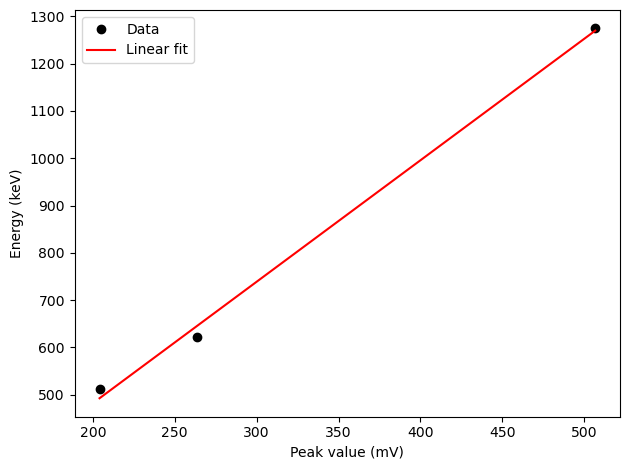

In [21]:
coeffs = np.polyfit(centers, peak_values, 1)
m, b = coeffs
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Generate fit line
x_fit = np.linspace(min(centers), max(centers), 500)
y_fit = m * x_fit + b

# --- Plot ---
plt.figure()
plt.plot(centers, peak_values, 'ko', label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Linear fit')
plt.xlabel("Peak value (mV)")
plt.ylabel("Energy (keV)")
plt.legend()
plt.tight_layout()
plt.savefig("Calibration_graph.png")
plt.show()
# print(fit_result.fit_report())
# x_fit = np.linspace(min(centers), max(centers))
# plt.plot(x_fit, fit_result.eval(x=x_fit), 'r-', label='Linear fit')


## Fit results Linear fit

In [22]:
slope = fit_result.params['slope'].value
intercept = fit_result.params['intercept'].value
slope_err = fit_result.params['slope'].stderr
intercept_err = fit_result.params['intercept'].stderr

print("y = ax + b for a linear fit")
print(f"a = Slope = {slope:.6f} ± {slope_err:.6f}")
print(f"b = Intercept = {intercept:.6f} ± {intercept_err:.6f}")


y = ax + b for a linear fit
a = Slope = 0.374774 ± 0.010206
b = Intercept = 29.421918 ± 9.283183


# Data Analysis